In [37]:
import itertools
import numpy as np
from scipy import stats
import pylab as pl
from sklearn import svm, linear_model, cross_validation

In [41]:
np.random.seed(0)
theta = np.deg2rad(60)
w = np.array([np.sin(theta), np.cos(theta)])
K = 20
# Erzeuge eine Liste von (20,2)
X = np.random.randn(K, 2)
# Erzeugt eine Liste von Nullen
y = [0] * K
# Die Es wird eine kompelte Liste erzeugt mit labels
for i in range(1, 3):
    X = np.concatenate((X, np.random.randn(K, 2) + i * 4 * w)) 
    y = np.concatenate((y, [i] * K))
print(X.shape)
print(y)

(60, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [42]:
# Hier keine Ahnung warum wird so gemacht
X[::2] -= np.array([2, 5])
print(X[::2])
teil = (X.shape[0] / 2.0)
print(teil)
blocks = np.asarray([0, 1] * int(teil))
print(blocks)

[[-0.23594765 -4.59984279]
 [-0.13244201 -5.97727788]
 [-2.10321885 -4.5894015 ]
 [-1.23896227 -4.87832498]
 [-0.50592093 -5.20515826]
 [-4.55298982 -4.3463814 ]
 [ 0.26975462 -6.45436567]
 [-0.46722079 -3.53064123]
 [-2.88778575 -6.98079647]
 [-0.76970932 -3.79762015]
 [ 0.41554865 -4.42001794]
 [ 0.95444943 -3.4380743 ]
 [-0.14979623 -3.21274028]
 [ 0.95329648 -4.18063218]
 [ 1.53061884 -2.6975281 ]
 [ 0.79164117 -3.35955316]
 [ 1.64152776 -3.40178094]
 [ 0.55680325 -2.9480546 ]
 [ 2.6035023  -4.23482582]
 [ 0.59330447 -3.57884966]
 [ 3.76305339 -0.09917351]
 [ 6.41645542  0.89588918]
 [ 3.85745061  0.05445173]
 [ 5.13647821 -0.02336096]
 [ 4.93870325  0.78587049]
 [ 6.81135393 -2.34775906]
 [ 3.75507983  0.94362119]
 [ 6.85114526  0.48051479]
 [ 4.06697755  0.91006495]
 [ 5.8754552  -1.15501009]]
30.0
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [45]:
# split into train and test set
cv = cross_validation.StratifiedShuffleSplit(y, test_size=.5)
train, test = iter(cv).__next__()
X_train, y_train = X[train], y[train]
b_train = blocks[train]
X_test, y_test= X[test], y[test]
b_test = blocks[test]

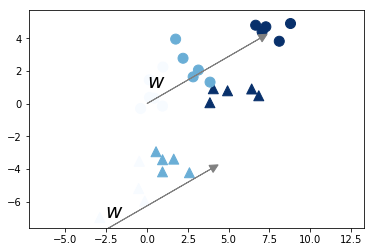

In [46]:
idx = (b_train == 0)
pl.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx], marker='^', cmap=pl.cm.Blues, s=100)
pl.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx],
    marker='o', cmap=pl.cm.Blues, s=100)
pl.arrow(0, 0, 8 * w[0], 8 * w[1], fc='gray', ec='gray',
    head_width=0.5, head_length=0.5)
pl.text(0, 1, '$w$', fontsize=20)
pl.arrow(-3, -8, 8 * w[0], 8 * w[1], fc='gray', ec='gray',
    head_width=0.5, head_length=0.5)
pl.text(-2.6, -7, '$w$', fontsize=20)
pl.axis('equal')
pl.show()

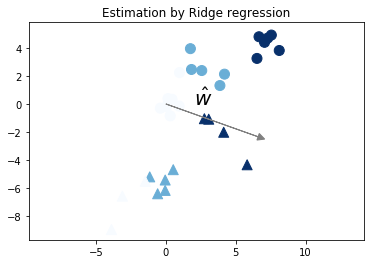

In [7]:
ridge = linear_model.Ridge(1.)
ridge.fit(X_train, y_train)
coef = ridge.coef_ / np.linalg.norm(ridge.coef_)
pl.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx],
    marker='^', cmap=pl.cm.Blues, s=100)
pl.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx],
    marker='o', cmap=pl.cm.Blues, s=100)
pl.arrow(0, 0, 7 * coef[0], 7 * coef[1], fc='gray', ec='gray',
    head_width=0.5, head_length=0.5)
pl.text(2, 0, '$\hat{w}$', fontsize=20)
pl.axis('equal')
pl.title('Estimation by Ridge regression')
pl.show()

In [8]:
for i in range(2):
    tau, _ = stats.kendalltau(
        ridge.predict(X_test[b_test == i]), y_test[b_test == i])
    print('Kendall correlation coefficient for block %s: %.5f' % (i, tau))

Kendall correlation coefficient for block 0: 0.71122
Kendall correlation coefficient for block 1: 0.84387


range(30, 2)


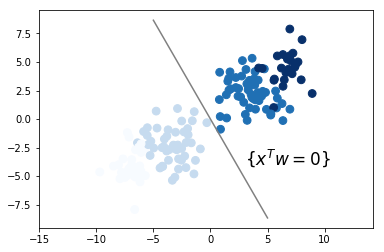

In [13]:
# form all pairwise combinations
comb = itertools.combinations(range(X_train.shape[0]), 2)
print(range(X_train.shape[0],2))
k = 0
Xp, yp, diff = [], [], []
for (i, j) in comb:
    if y_train[i] == y_train[j] \
        or blocks[train][i] != blocks[train][j]:
        # skip if same target or different group
        continue
    Xp.append(X_train[i] - X_train[j])
    diff.append(y_train[i] - y_train[j])
    yp.append(np.sign(diff[-1]))
    # output balanced classes
    if yp[-1] != (-1) ** k:
        yp[-1] *= -1
        Xp[-1] *= -1
        diff[-1] *= -1
    k += 1
Xp, yp, diff = map(np.asanyarray, (Xp, yp, diff))
pl.scatter(Xp[:, 0], Xp[:, 1], c=diff, s=60, marker='o', cmap=pl.cm.Blues)
x_space = np.linspace(-10, 10)
pl.plot(x_space * w[1], - x_space * w[0], color='gray')
pl.text(3, -4, '$\{x^T w = 0\}$', fontsize=17)
pl.axis('equal')
pl.show()
